In [ ]:
import pandas as pd



Searching for pain score files...
Found 10 pain score files

Loaded 534 total pain measurements
Participants: 9
Sessions: 10
Date range: 2000-01-01 12:30:00 to 2000-01-11 15:33:00

Plotting 9 participants...


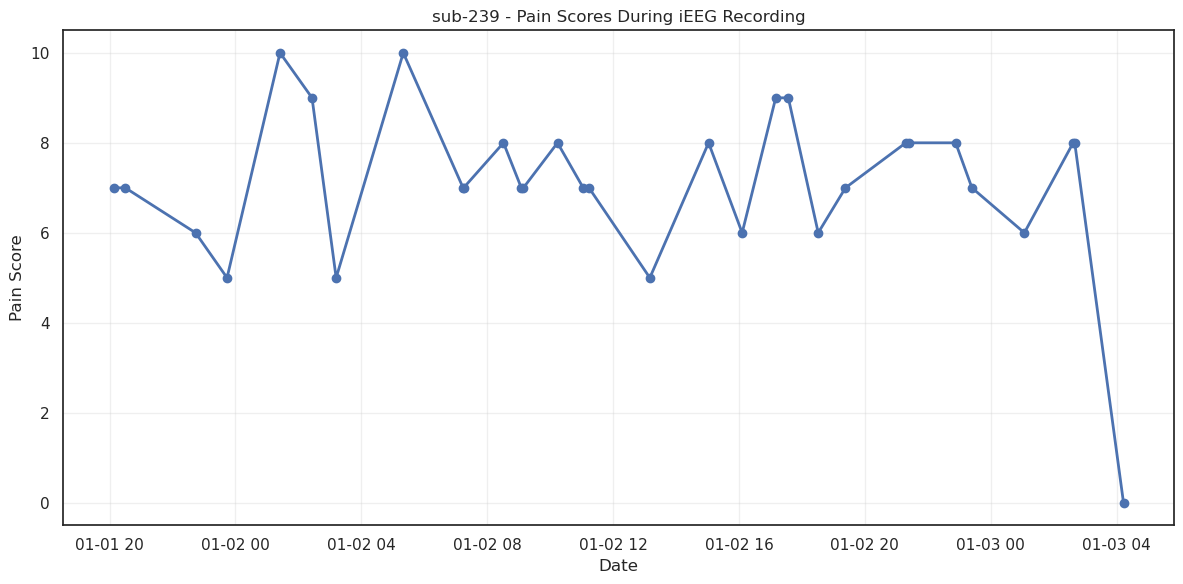

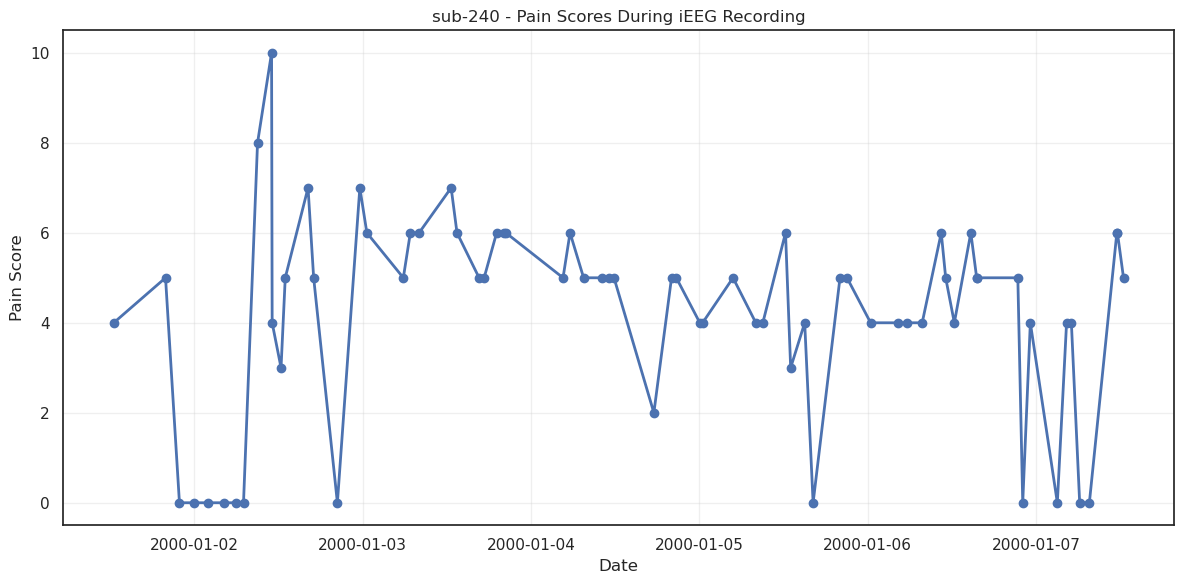

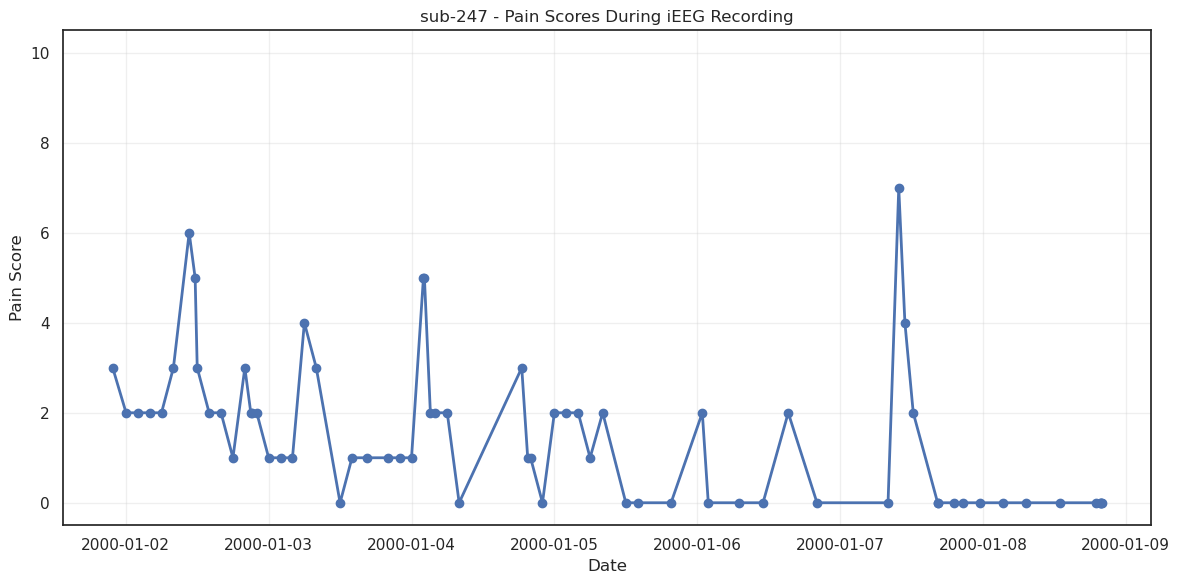

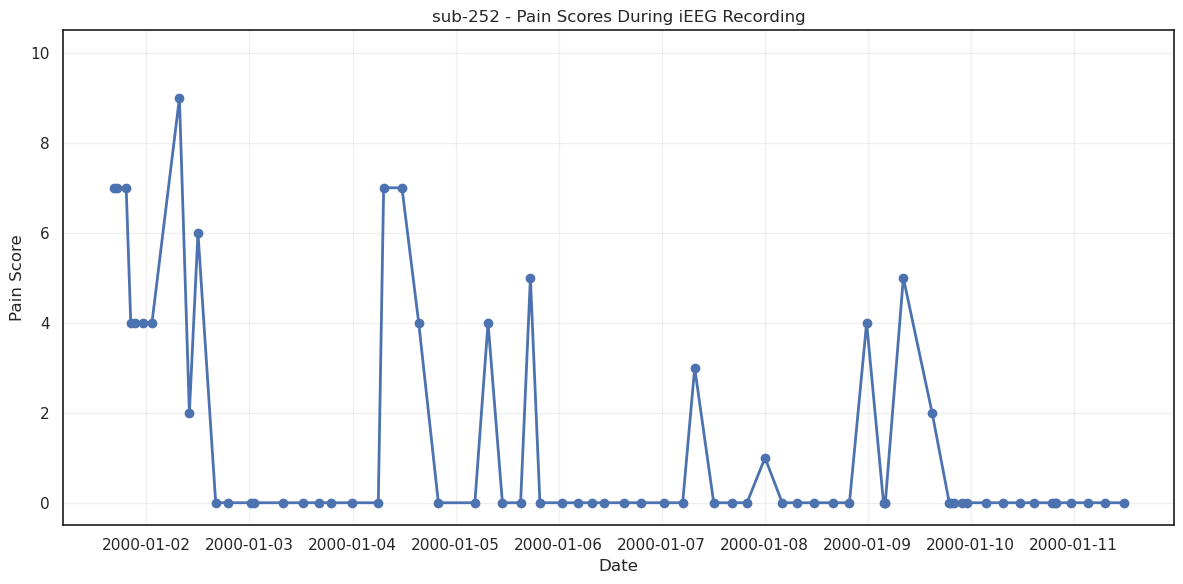

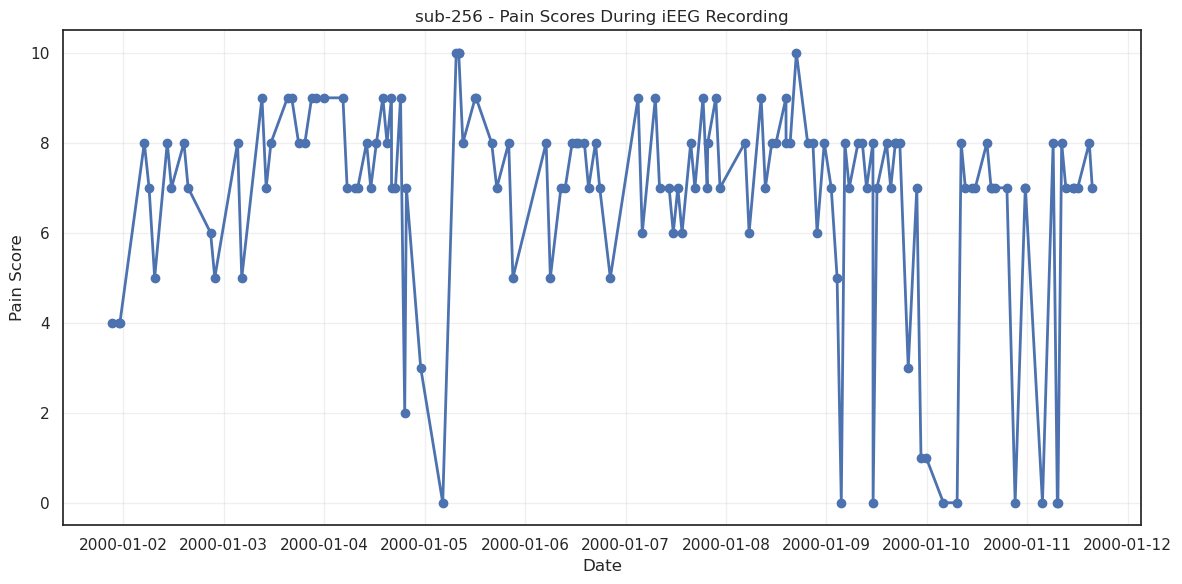

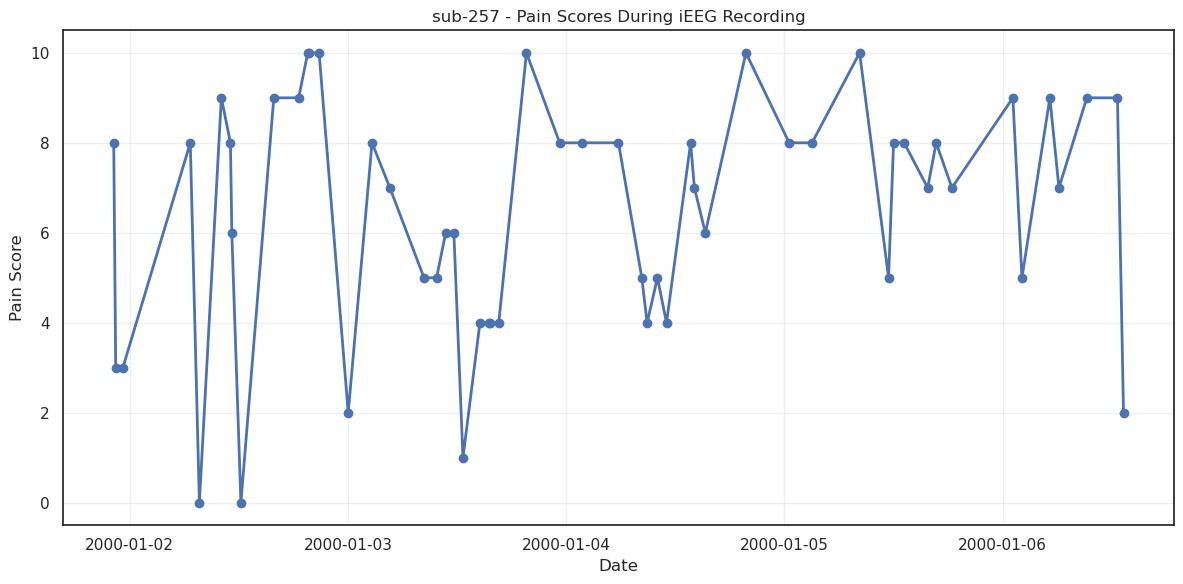

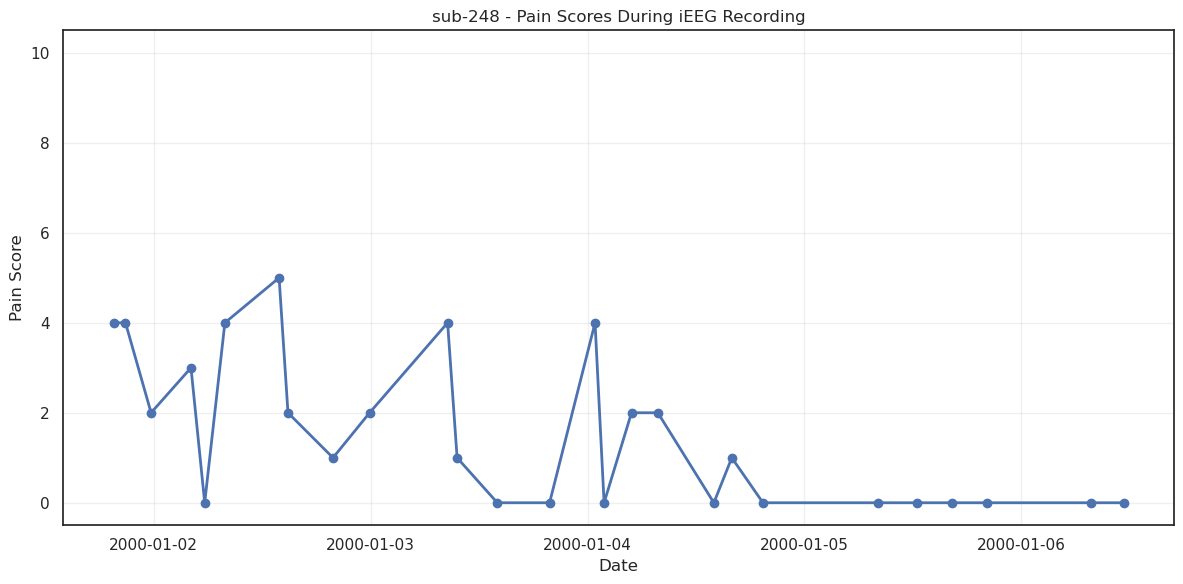

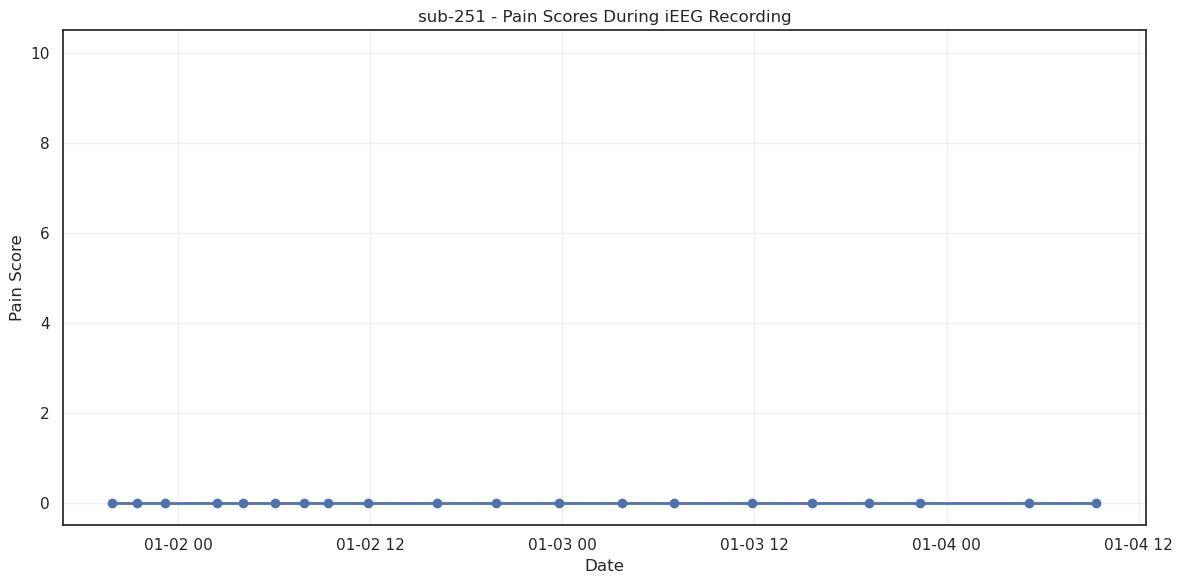

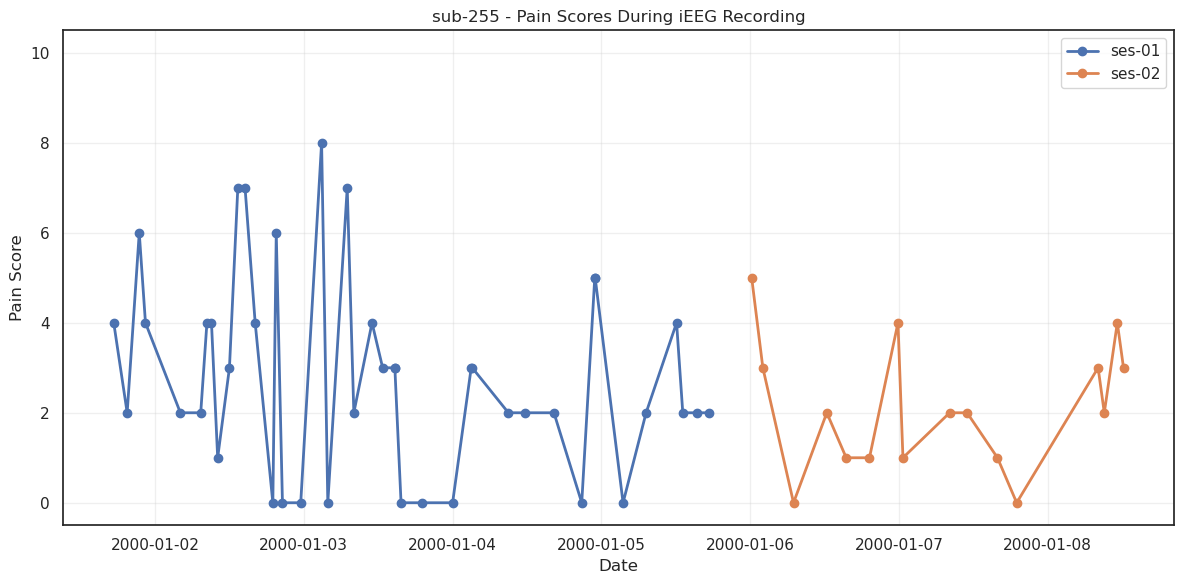


SUMMARY STATISTICS

Total participants: 9
Total sessions: 10
Total pain measurements: 534

Pain score distribution:
  Mean: 4.10
  Median: 4.00
  Std: 3.27
  Min: 0
  Max: 10

Pain measurements per session:
  Mean: 53.4
  Median: 48
  Min: 16
  Max: 137


In [2]:
# %%
"""
Load and visualize pain scores for all participants from individual session CSVs
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Set style
sns.set_theme(style="white")

# %%
# Configuration
BIDS_DIR = Path('/mnt/NAS/EHR/EHR_for_sherlock')

# %%
# Find all pain score CSV files
print("Searching for pain score files...")
pain_files = list(BIDS_DIR.glob('sub-*/ses-*/ehr/*_pain-scores.csv'))
print(f"Found {len(pain_files)} pain score files")

# %%
# Load all pain data
all_pain_data = []

for file in pain_files:
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    all_pain_data.append(df)

# Combine all data
pain_df = pd.concat(all_pain_data, ignore_index=True)

print(f"\nLoaded {len(pain_df)} total pain measurements")
print(f"Participants: {pain_df['sub_id'].nunique()}")
print(f"Sessions: {len(pain_df.groupby(['sub_id', 'ses_id']))}")
print(f"Date range: {pain_df['date'].min()} to {pain_df['date'].max()}")

# %%
# Plot pain scores over time for each participant
participants = pain_df['sub_id'].unique()

print(f"\nPlotting {len(participants)} participants...")

for sub_id in participants:
    participant_data = pain_df[pain_df['sub_id'] == sub_id].sort_values('date')
    
    plt.figure(figsize=(12, 6))
    
    # Get all sessions for this participant
    sessions = participant_data['ses_id'].unique()
    
    # Plot each session with a different color
    for ses_id in sessions:
        session_data = participant_data[participant_data['ses_id'] == ses_id]
        plt.plot(session_data['date'], session_data['max_pain'], 
                marker='o', linewidth=2, label=ses_id)
    
    plt.xlabel('Date')
    plt.ylabel('Pain Score')
    plt.title(f'{sub_id} - Pain Scores During iEEG Recording')
    plt.ylim(-0.5, 10.5)
    plt.grid(True, alpha=0.3)
    
    # Add legend if multiple sessions
    if len(sessions) > 1:
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# %%
# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nTotal participants: {pain_df['sub_id'].nunique()}")
print(f"Total sessions: {len(pain_df.groupby(['sub_id', 'ses_id']))}")
print(f"Total pain measurements: {len(pain_df)}")

print(f"\nPain score distribution:")
print(f"  Mean: {pain_df['max_pain'].mean():.2f}")
print(f"  Median: {pain_df['max_pain'].median():.2f}")
print(f"  Std: {pain_df['max_pain'].std():.2f}")
print(f"  Min: {pain_df['max_pain'].min():.0f}")
print(f"  Max: {pain_df['max_pain'].max():.0f}")

# Measurements per session
measurements_per_session = pain_df.groupby(['sub_id', 'ses_id']).size()
print(f"\nPain measurements per session:")
print(f"  Mean: {measurements_per_session.mean():.1f}")
print(f"  Median: {measurements_per_session.median():.0f}")
print(f"  Min: {measurements_per_session.min()}")
print(f"  Max: {measurements_per_session.max()}")


In [3]:
# %%
# Get statistics for sub-256 and sub-257
target_subs = ['sub-256', 'sub-257']

for sub_id in target_subs:
    sub_data = pain_df[pain_df['sub_id'] == sub_id]
    
    
    if len(sub_data) == 0:
        print(f"\n{sub_id}: No pain data found")
        continue
    
    print(f"\n{sub_id}")
    print("="*50)
    print(f"Number of measurements: {len(sub_data)}")
    print(f"Mean pain score: {sub_data['max_pain'].mean():.2f}")
    print(f"Median pain score: {sub_data['max_pain'].median():.2f}")
    print(f"Range: {sub_data['max_pain'].min():.0f} - {sub_data['max_pain'].max():.0f}")
    print(f"Standard deviation: {sub_data['max_pain'].std():.2f}")
    
    # Show session breakdown if multiple sessions
    sessions = sub_data['ses_id'].unique()
    if len(sessions) > 1:
        print(f"\nSessions: {len(sessions)}")
        for ses_id in sessions:
            ses_data = sub_data[sub_data['ses_id'] == ses_id]
            print(f"  {ses_id}: {len(ses_data)} measurements, "
                  f"mean={ses_data['max_pain'].mean():.2f}, "
                  f"median={ses_data['max_pain'].median():.2f}")



sub-256
Number of measurements: 137
Mean pain score: 6.80
Median pain score: 7.00
Range: 0 - 10
Standard deviation: 2.39

sub-257
Number of measurements: 54
Mean pain score: 6.50
Median pain score: 7.00
Range: 0 - 10
Standard deviation: 2.68


In [4]:
import pynwb

processed_path = '/mnt/NAS/sub-240_ses-01_run-FA6151RL_bipolar_psd.nwb'
io = pynwb.NWBHDF5IO(processed_path, 'r')
nwb = io.read()

/home/klab/anaconda3/envs/iEEG_EHR_Analysis/lib/python3.14/site-packages/pynwb/misc.py:331: UserWarning: Neither source_timeseries nor source_channels is present in DecompositionSeries. It is recommended to indicate the source timeseries if it is present, or else to link to the corresponding source_channels. (Optional)
  warnings.warn("Neither source_timeseries nor source_channels is present in DecompositionSeries. It is "


In [5]:
nwb

Data type,float32
Shape,()
Array size,4.00 bytes
Data type,float32
Shape,"(120, 213, 6)"
Array size,599.06 KiB
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),613440
Compressed size (bytes),613440


In [8]:
# %%
"""
Analyze band power in the 5 minutes preceding pain score assessments
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pynwb import NWBHDF5IO
from datetime import timedelta

# Set style
sns.set_theme(style="white")

# %%
# Configuration
BIDS_DIR = Path('/mnt/NAS/EHR/EHR_for_sherlock')
SUBJECT = 'sub-240'  # Change this to your subject
SESSION = 'ses-01'   # Change this to your session

# Paths
# NWB_FILE = BIDS_DIR / SUBJECT / SESSION / 'ieeg' / f'{SUBJECT}_{SESSION}_ieeg_preprocessed.nwb'
# PAIN_FILE = BIDS_DIR / SUBJECT / SESSION / 'ehr' / f'{SUBJECT}_{SESSION}_pain-scores.csv'

NWB_FILE = Path('/mnt/NAS/sub-240_ses-01_run-FA6151RL_bipolar_psd.nwb')
PAIN_FILE = BIDS_DIR / SUBJECT / SESSION / 'ehr' / f'{SUBJECT}_{SESSION}_pain-scores.csv'

print(f"NWB file: {NWB_FILE}")
print(f"NWB file exists: {NWB_FILE.exists()}")
print(f"Pain file: {PAIN_FILE}")
print(f"Pain file exists: {PAIN_FILE.exists()}")

# %%
# Load pain scores
print("\nLoading pain scores...")
pain_df = pd.read_csv(PAIN_FILE)
pain_df['date'] = pd.to_datetime(pain_df['date'])

print(f"Found {len(pain_df)} pain assessments")
print(f"Pain score range: {pain_df['max_pain'].min()} - {pain_df['max_pain'].max()}")
print(f"Time range: {pain_df['date'].min()} to {pain_df['date'].max()}")

# %%
# Load NWB file
print("\nLoading NWB file...")
io = NWBHDF5IO(str(NWB_FILE), 'r')
nwbfile = io.read()

print(f"NWB file loaded: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")

# %%
# Explore what's in the NWB file
print("\nProcessing modules:")
for module_name in nwbfile.processing.keys():
    print(f"  - {module_name}")
    module = nwbfile.processing[module_name]
    for container_name in module.data_interfaces.keys():
        print(f"    - {container_name}")

# %%
# Load band power data (adjust module/container names as needed)
# Common names: 'ecephys', 'behavior', or custom names
# You'll need to adjust these based on your NWB structure
MODULE_NAME = 'ecephys'  # or 'preprocessing', check your NWB structure
CONTAINER_NAME = 'band_power'  # or 'BandPower', 'bandpower', etc.

try:
    band_power_container = nwbfile.processing[MODULE_NAME][CONTAINER_NAME]
    print(f"\nFound band power data: {CONTAINER_NAME}")
    
    # Get the time series data
    band_power_data = band_power_container.data[:]
    band_power_timestamps = band_power_container.timestamps[:]
    
    print(f"Band power shape: {band_power_data.shape}")
    print(f"Timestamps shape: {band_power_timestamps.shape}")
    print(f"Time range: {band_power_timestamps[0]} to {band_power_timestamps[-1]} seconds")
    
    # Convert timestamps to datetime
    session_start = nwbfile.session_start_time
    band_power_times = pd.to_datetime(session_start) + pd.to_timedelta(band_power_timestamps, unit='s')
    
    print(f"Datetime range: {band_power_times[0]} to {band_power_times[-1]}")
    
except KeyError as e:
    print(f"\nError: Could not find band power data")
    print(f"Available modules: {list(nwbfile.processing.keys())}")
    if MODULE_NAME in nwbfile.processing:
        print(f"Available containers in {MODULE_NAME}: {list(nwbfile.processing[MODULE_NAME].data_interfaces.keys())}")

# %%
# Get band names (frequency bands)
# This depends on your preprocessing - common bands: delta, theta, alpha, beta, gamma, high_gamma
try:
    # Try to get band names from description or metadata
    if hasattr(band_power_container, 'description'):
        print(f"\nDescription: {band_power_container.description}")
    
    # Assuming bands are in columns
    # You may need to adjust this based on your data structure
    n_bands = band_power_data.shape[1] if len(band_power_data.shape) > 1 else 1
    
    # Common band names - adjust if your preprocessing uses different names
    band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma', 'high_gamma'][:n_bands]
    
    print(f"Number of frequency bands: {n_bands}")
    print(f"Band names: {band_names}")
    
except Exception as e:
    print(f"Error getting band info: {e}")

# %%
# Extract band power for 5 minutes before each pain assessment
window_minutes = 5
results = []

for idx, pain_row in pain_df.iterrows():
    pain_time = pain_row['date']
    pain_score = pain_row['max_pain']
    
    # Define 5-minute window before pain assessment
    window_start = pain_time - timedelta(minutes=window_minutes)
    window_end = pain_time
    
    # Find band power data in this window
    mask = (band_power_times >= window_start) & (band_power_times < window_end)
    window_data = band_power_data[mask]
    window_times = band_power_times[mask]
    
    if len(window_data) == 0:
        print(f"No band power data for pain assessment at {pain_time}")
        continue
    
    print(f"\nPain score {pain_score} at {pain_time}")
    print(f"  Found {len(window_data)} band power samples in 5-min window")
    
    # Calculate mean band power across the window for each band
    if len(window_data.shape) > 1:
        # Multiple bands
        mean_power = window_data.mean(axis=0)
        for band_idx, band_name in enumerate(band_names):
            results.append({
                'pain_time': pain_time,
                'pain_score': pain_score,
                'band': band_name,
                'mean_power': mean_power[band_idx],
                'n_samples': len(window_data)
            })
    else:
        # Single band or channel
        mean_power = window_data.mean()
        results.append({
            'pain_time': pain_time,
            'pain_score': pain_score,
            'band': 'band_power',
            'mean_power': mean_power,
            'n_samples': len(window_data)
        })

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\nExtracted band power for {len(pain_df)} pain assessments")
print(results_df.head())

# %%
# Plot: Band power vs pain score for each frequency band
if len(results_df) > 0:
    bands = results_df['band'].unique()
    
    fig, axes = plt.subplots(1, len(bands), figsize=(5*len(bands), 5))
    if len(bands) == 1:
        axes = [axes]
    
    for idx, band in enumerate(bands):
        band_data = results_df[results_df['band'] == band]
        
        axes[idx].scatter(band_data['pain_score'], band_data['mean_power'], alpha=0.6)
        axes[idx].set_xlabel('Pain Score')
        axes[idx].set_ylabel('Mean Band Power')
        axes[idx].set_title(f'{band.capitalize()}')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# %%
# Plot: Band power over time, colored by pain score
if len(results_df) > 0:
    for band in results_df['band'].unique():
        band_data = results_df[results_df['band'] == band]
        
        plt.figure(figsize=(12, 6))
        scatter = plt.scatter(band_data['pain_time'], band_data['mean_power'], 
                            c=band_data['pain_score'], cmap='YlOrRd', 
                            s=100, alpha=0.7)
        plt.colorbar(scatter, label='Pain Score')
        plt.xlabel('Time')
        plt.ylabel('Mean Band Power')
        plt.title(f'{band.capitalize()} - Band Power Before Pain Assessments')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# %%
# Correlation analysis
if len(results_df) > 0:
    print("\nCorrelation between pain score and band power:")
    for band in results_df['band'].unique():
        band_data = results_df[results_df['band'] == band]
        corr = band_data[['pain_score', 'mean_power']].corr().iloc[0, 1]
        print(f"  {band}: r = {corr:.3f}")

# %%
# Close NWB file
io.close()
print("\nNWB file closed")

NWB file: /mnt/NAS/sub-240_ses-01_run-FA6151RL_bipolar_psd.nwb
NWB file exists: True
Pain file: /mnt/NAS/EHR/EHR_for_sherlock/sub-240/ses-01/ehr/sub-240_ses-01_pain-scores.csv
Pain file exists: True

Loading pain scores...
Found 69 pain assessments
Pain score range: 0.0 - 10.0
Time range: 2000-01-01 12:30:00 to 2000-01-07 12:27:00

Loading NWB file...
NWB file loaded: sub-240_ses-01_bipolar_psd
Session description: iEEG recording from patient sub-240 - bipolar referenced, band power computed
Session start time: 2000-01-01 12:08:37-08:00

Processing modules:
  - ecephys
    - band_power

Found band power data: band_power


/home/klab/anaconda3/envs/iEEG_EHR_Analysis/lib/python3.14/site-packages/pynwb/misc.py:331: UserWarning: Neither source_timeseries nor source_channels is present in DecompositionSeries. It is recommended to indicate the source timeseries if it is present, or else to link to the corresponding source_channels. (Optional)
  warnings.warn("Neither source_timeseries nor source_channels is present in DecompositionSeries. It is "


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# %%
"""
Plot band power over time for selected channels
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pynwb import NWBHDF5IO
import pandas as pd

# Set style
sns.set_theme(style="white")

# %%
# Configuration
BIDS_DIR = Path('/mnt/NAS/')
SUBJECT = 'sub-240'
SESSION = 'ses-01'

NWB_FILE = BIDS_DIR / SUBJECT / SESSION / 'ieeg' / f'{SUBJECT}_{SESSION}_ieeg_preprocessed.nwb'

print(f"Loading: {NWB_FILE}")
print(f"Exists: {NWB_FILE.exists()}")

# %%
# Load NWB file
io = NWBHDF5IO(str(NWB_FILE), 'r')
nwbfile = io.read()

print(f"Session start: {nwbfile.session_start_time}")

# %%
# Explore NWB structure
print("\nAvailable processing modules:")
for module_name in nwbfile.processing.keys():
    print(f"\n  Module: {module_name}")
    module = nwbfile.processing[module_name]
    for container_name in module.data_interfaces.keys():
        container = module.data_interfaces[container_name]
        print(f"    Container: {container_name}")
        if hasattr(container, 'data'):
            print(f"      Shape: {container.data.shape}")

# %%
# Load band power data (adjust these names based on your NWB structure)
MODULE_NAME = 'ecephys'  # Change if needed
CONTAINER_NAME = 'band_power'  # Change if needed

band_power_container = nwbfile.processing[MODULE_NAME][CONTAINER_NAME]
band_power_data = band_power_container.data[:]
band_power_timestamps = band_power_container.timestamps[:]

print(f"\nBand power shape: {band_power_data.shape}")
print(f"(timepoints, channels, bands) or similar")
print(f"Timestamps: {len(band_power_timestamps)} timepoints")
print(f"Time range: {band_power_timestamps[0]:.2f} to {band_power_timestamps[-1]:.2f} seconds")

# Convert timestamps to minutes for easier plotting
time_minutes = band_power_timestamps / 60

# %%
# Assume shape is (timepoints, channels, bands) - adjust if different
# If your data has a different shape, modify the indexing below

# Select a few channels to plot
channels_to_plot = [0, 1, 2, 3, 4]  # First 5 channels
band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma', 'high_gamma']

print(f"\nPlotting channels: {channels_to_plot}")

# %%
# Plot each frequency band for selected channels
for band_idx, band_name in enumerate(band_names):
    plt.figure(figsize=(15, 8))
    
    for ch_idx in channels_to_plot:
        # Extract data for this channel and band
        # Adjust indexing based on your data shape
        channel_data = band_power_data[:, ch_idx, band_idx]
        
        plt.plot(time_minutes, channel_data, label=f'Channel {ch_idx}', alpha=0.7)
    
    plt.xlabel('Time (minutes)')
    plt.ylabel('Band Power')
    plt.title(f'{band_name.capitalize()} Band Power Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# %%
# Alternative: Plot all bands for a single channel
channel = 0  # Choose a channel

plt.figure(figsize=(15, 8))

for band_idx, band_name in enumerate(band_names):
    channel_data = band_power_data[:, channel, band_idx]
    plt.plot(time_minutes, channel_data, label=band_name.capitalize(), alpha=0.7)

plt.xlabel('Time (minutes)')
plt.ylabel('Band Power')
plt.title(f'All Frequency Bands - Channel {channel}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Close NWB file
io.close()
print("\nNWB file closed")